In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install squarify

## Importing Dependencies

In [214]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import missingno as msno
from scipy.stats import norm
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

## 데이터 불러오기

#### **Netflix**

In [4]:
netflix_df = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')
netflix_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


#### **Disney**

In [5]:
disney_df = pd.read_csv('/content/drive/MyDrive/disney_plus_titles.csv')
disney_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.


## 데이터 살펴보기

#### **Netflix**

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [9]:
# missing values
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### **Disney**

In [10]:
disney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [11]:
disney_df.nunique()

show_id         1450
type               2
title           1450
director         609
cast            1193
country           89
date_added       167
release_year      90
rating             9
duration         158
listed_in        329
description     1448
dtype: int64

In [12]:
disney_df.isna().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

* Disney 데이터가 Netflix 보다 많이 적음
* Disney, Netflix 모두 director, cast 결측치 많음


## 데이터 전처리

#### **Netflix**

#### rating & duration

In [14]:
netflix_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [15]:
netflix_df[netflix_df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [16]:
netflix_df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [17]:
netflix_df[netflix_df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


'rating'에 있는 '74 min', '84 min', '66 min'은 'duration' 으로 옮기기

In [18]:
netflix_df.loc[5541,'duration'] = '74 min' 
netflix_df.loc[5541,'rating'] = np.nan 

netflix_df.loc[5794,'duration'] = '84 min'
netflix_df.loc[5794,'rating'] = np.nan

netflix_df.loc[5813,'duration'] = '66 min'
netflix_df.loc[5813,'rating'] = np.nan

#### director & cast

결측치가 너무 많기 때문에 제거함

In [19]:
netflix_df = netflix_df.drop(['director', 'cast'], axis=1)
netflix_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### date_added

In [20]:
netflix_df[netflix_df['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [24]:
netflix_df = netflix_df[netflix_df['date_added'].notna()]
netflix_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


date_added 의 결측치 제거

#### country

In [26]:
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])
netflix_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [27]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          7
duration        0
listed_in       0
description     0
dtype: int64

#### year_added, month_added 생성
year과 month 값을 `date_added`로 부터 추출

In [29]:
netflix_df['year_added'] = netflix_df['date_added'].apply(lambda x:x.split(" ")[-1])
netflix_df['year_added'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year_added, dtype: object

In [30]:
netflix_df['month_added'] = netflix_df['date_added'].apply(lambda x:x.split(" ")[0])
netflix_df['month_added'].head()

0    September
1    September
2    September
3    September
4    September
Name: month_added, dtype: object

In [31]:
netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September


#### rating 을 기준으로 TV 타겟층 생성

Amazon에서 제공하는 [rating information](https://www.amazon.com/gp/help/customer/display.html?nodeId=G2C2CPZWGZWHZ42J) 기준으로 다음과 같이 치환

In [34]:
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [36]:
netflix_df['target_ages'] = netflix_df['rating'].replace(rating_ages)
netflix_df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', nan], dtype=object)

In [37]:
netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Teens
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,Adults
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Adults
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,Adults
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,Adults


In [39]:
netflix_df['principal_country'] = netflix_df['country'].apply(lambda x:x.split(",")[0])
netflix_df['principal_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: principal_country, dtype: object

#### data type

In [42]:
netflix_df.dtypes

show_id              object
type                 object
title                object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
year_added           object
month_added          object
target_ages          object
principal_country    object
dtype: object

In [43]:
# type - category
netflix_df['type'] = pd.Categorical(netflix_df['type'])
# target_ages - category (4 classes)
netflix_df['target_ages'] = pd.Categorical(netflix_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

#year added - integer
netflix_df['year_added'] = pd.to_numeric(netflix_df['year_added'])

In [44]:
netflix_df.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
year_added              int64
month_added            object
target_ages          category
principal_country      object
dtype: object

#### **Disney**

#### rating

In [45]:
disney_df['rating'].unique()

array(['TV-G', 'PG', 'TV-PG', nan, 'PG-13', 'TV-14', 'G', 'TV-Y7', 'TV-Y',
       'TV-Y7-FV'], dtype=object)

In [46]:
disney_df[disney_df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
276,s277,Movie,Disney My Music Story: Perfume,Kentaro Takayanagi,"a-chan , KASHIYUKA , NOCCHi",NaN,"March 19, 2021",2019,NaN,53 min,"Biographical, Documentary, Music",J-Pop band Perfume shares their passion for mu...
280,s281,TV Show,Marvel Studios ASSEMBLED,NaN,NaN,NaN,"March 12, 2021",2021,NaN,1 Season,"Anthology, Docuseries",ASSEMBLED is an immersive series of docu-speci...


In [49]:
disney_df = disney_df[disney_df['rating'].notna()]
disney_df['rating'].isna().sum()

0

#### duration

In [50]:
disney_df['duration'].unique()

array(['23 min', '91 min', '41 min', '94 min', '1 Season', '2 Seasons',
       '45 min', '59 min', '4 min', '10 Seasons', '2 min', '1 min',
       '8 min', '3 Seasons', '110 min', '11 min', '7 min', '95 min',
       '129 min', '14 min', '5 min', '134 min', '9 min', '30 min',
       '6 min', '22 min', '3 min', '87 min', '90 min', '93 min',
       '101 min', '132 min', '44 min', '131 min', '104 min', '5 Seasons',
       '52 min', '47 min', '53 min', '85 min', '92 min', '135 min',
       '4 Seasons', '105 min', '99 min', '32 Seasons', '88 min',
       '127 min', '106 min', '116 min', '42 min', '16 Seasons', '140 min',
       '19 Seasons', '66 min', '115 min', '137 min', '9 Seasons',
       '126 min', '82 min', '125 min', '54 min', '7 Seasons', '98 min',
       '102 min', '80 min', '170 min', '97 min', '112 min', '21 min',
       '20 min', '15 min', '19 min', '79 min', '6 Seasons', '89 min',
       '18 min', '81 min', '148 min', '121 min', '96 min', '109 min',
       '107 min', '86 min', '

#### director & cast

In [52]:
disney_df = disney_df.drop(['director','cast'], axis=1)
disney_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### date_added

In [53]:
disney_df[disney_df['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
1439,s1440,TV Show,Disney Kirby Buckets,United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,s1441,TV Show,Disney Mech-X4,Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1441,s1442,TV Show,Imagination Movers,United States,NaN,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [54]:
disney_df = disney_df[disney_df['date_added'].notna()]
disney_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,"United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,"United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,"United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,"United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


#### country

In [55]:
disney_df['country'] = disney_df['country'].fillna(disney_df['country'].mode()[0])
disney_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,"United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,"United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,"United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,"United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [56]:
disney_df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### year_added, month_added 생성

In [57]:
disney_df['year_added'] = disney_df['date_added'].apply(lambda x:x.split(" ")[-1])
disney_df['year_added'].head()

0    2021
1    2021
2    2021
3    2021
5    2021
Name: year_added, dtype: object

In [58]:
disney_df['month_added'] = disney_df['date_added'].apply(lambda x:x.split(" ")[0])
disney_df['month_added'].head()

0    November
1    November
2    November
3    November
5    November
Name: month_added, dtype: object

In [59]:
disney_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,November
1,s2,Movie,Ernest Saves Christmas,United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021,November
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021,November
3,s4,Movie,The Queen Family Singalong,United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",2021,November
5,s6,Movie,Becoming Cousteau,United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,2021,November


#### rating 을 기준으로 TV 타겟층 생성

In [60]:
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [61]:
disney_df['target_ages'] = disney_df['rating'].replace(rating_ages)
disney_df['target_ages'].unique()

array(['Kids', 'Older Kids', 'Teens'], dtype=object)

In [62]:
disney_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,November,Kids
1,s2,Movie,Ernest Saves Christmas,United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021,November,Older Kids
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021,November,Kids
3,s4,Movie,The Queen Family Singalong,United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",2021,November,Older Kids
5,s6,Movie,Becoming Cousteau,United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,2021,November,Teens


In [63]:
disney_df['principal_country'] = disney_df['country'].apply(lambda x:x.split(",")[0])
disney_df['principal_country'].head()

0    United States
1    United States
2    United States
3    United States
5    United States
Name: principal_country, dtype: object

#### data type

In [64]:
disney_df.dtypes

show_id              object
type                 object
title                object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
year_added           object
month_added          object
target_ages          object
principal_country    object
dtype: object

In [65]:
# type - category
disney_df['type'] = pd.Categorical(disney_df['type'])
# target_ages - category
disney_df['target_ages'] = pd.Categorical(disney_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# year_added - integer
disney_df['year_added'] = pd.to_numeric(disney_df['year_added'])

In [66]:
disney_df.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
year_added              int64
month_added            object
target_ages          category
principal_country      object
dtype: object



---

## 데이터 시각화 - Comparison of Netflix and Disney

#### Contents Type

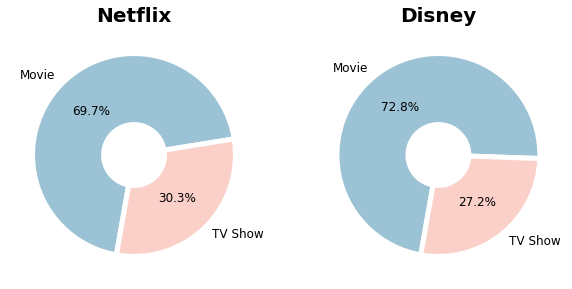

In [89]:
labels = ['Movie', 'TV Show']
colors = ['#9CC3D5FF', '#FAD0C9FF']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth' : 5}
textprops={'fontsize':12, 'fontweight':'light'}

fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].pie(netflix_df['type'].value_counts(), labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops, textprops=textprops)
axs[0].set_title('Netflix', fontsize=20, fontweight='bold')
axs[1].pie(disney_df['type'].value_counts(), labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops, textprops=textprops)
axs[1].set_title('Disney', fontsize=20, fontweight='bold')

plt.show()

Disney 보다 Netflix의 TV Show 비율이 더 높음

#### Rating Distribution

In [105]:
def generate_rating_df(netflix_df):
  rating_df = netflix_df.groupby(['rating', 'target_ages']).agg({'show_id':'count'}).reset_index()
  rating_df = rating_df[rating_df['show_id'] != 0]
  rating_df.columns = ['rating', 'target_ages', 'counts']
  rating_df = rating_df.sort_values('target_ages')
  return rating_df

In [118]:
custom_template = {
    "layout": go.Layout(
        font={
            "family": "Lato",
            "size": 12,
            "color": "#707070",
        },
        title={
            "font": {
                "family": "Lato",
                "size": 20,
                "color": "#000000",
            },
        },
        plot_bgcolor="#ffffff",
        paper_bgcolor="#ffffff",
        colorway=px.colors.qualitative.G10,
    )
}

In [119]:
def format_title(title, subtitle=None, subtitle_font_size=14):
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

In [122]:
rating_df = generate_rating_df(netflix_df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', 
             title=format_title("Netflix Rating", 'grouped by target ages'), template=custom_template)

fig.show()

In [121]:
rating_df = generate_rating_df(disney_df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', 
             title=format_title("Disney Rating", 'grouped by target ages'), template=custom_template)

fig.show()

* Disney 는 최대 청소년까지 보유하고 있고 대부분 아이용 컨텐츠
* Netflix 는 아이부터 성인까지 분포가 다양하며 특히 성인용 컨텐츠 수가 많음

#### Country

In [130]:
year_country1 = netflix_df.groupby('year_added')['principal_country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country1, locations='principal_country', color='counts',
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                    )

fig.update_layout(title=format_title('Netflix Comparison by country'))

fig.show()

In [129]:
year_country2 = disney_df.groupby('year_added')['principal_country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country2, locations='principal_country', color='counts',
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                    )

fig.update_layout(title=format_title('Disney Comparison by country'))

fig.show()

In [141]:
country_count=netflix_df['principal_country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:10]
topcountries

,principal_country
United States,4035
India,1008
United Kingdom,627
Canada,271
Japan,258
France,212
South Korea,211
Spain,181
Mexico,134
Australia,116


In [142]:
data = dict(
    number=[4035, 1008, 627, 271, 258, 212, 211, 181, 134, 116],
    countries=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])
fig = px.funnel(data, x='number', y='countries')
fig.update_layout(title=format_title('Netflix top 10 producing countries'))
fig.show()

In [143]:
country_count=disney_df['principal_country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:10]
topcountries

,principal_country
United States,1335
United Kingdom,50
Canada,25
France,10
Australia,4
Argentina,3
Ireland,3
Germany,2
China,2
India,2


In [145]:
data2 = dict(
    number2=[1335, 50, 25, 10, 4, 3, 3, 2, 2, 2],
    countries2=['United States', 'United Kingdom', 'Canada', 'France', 'Australia', 'Argentina', 'Ireland', 'Germany', 'China', 'India'])
fig = px.funnel(data2, x='number2', y='countries2')
fig.update_layout(title=format_title('Disney top 10 producing countries'))
fig.show()

* Disney 는 미국에 쏠려있는 반면 Netflix 는 나름 나라 별 분포되어있음
* 둘 다 미국이 1위

#### Distribution of content released

In [149]:
released_year_df = netflix_df.loc[netflix_df['release_year'] > 2000].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_df = netflix_df.loc[netflix_df['year_added'] > 2000].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))
fig.update_xaxes(title=format_title('Netflix contents released over the years'), categoryorder='total descending')
fig.show()

In [150]:
released_year_df2 = disney_df.loc[disney_df['release_year'] > 2000].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_df2 = disney_df.loc[disney_df['year_added'] > 2000].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=released_year_df2.loc[released_year_df2['type'] == 'Movie']['release_year'], 
    y=released_year_df2.loc[released_year_df2['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))
fig.add_trace(go.Scatter( 
    x=released_year_df2.loc[released_year_df2['type'] == 'TV Show']['release_year'], 
    y=released_year_df2.loc[released_year_df2['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))
fig.add_trace(go.Scatter( 
    x=added_year_df2.loc[added_year_df2['type'] == 'Movie']['year_added'], 
    y=added_year_df2.loc[added_year_df2['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))
fig.add_trace(go.Scatter( 
    x=added_year_df2.loc[added_year_df2['type'] == 'TV Show']['year_added'], 
    y=added_year_df2.loc[added_year_df2['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))
fig.update_xaxes(title=format_title('Disney contents released over the years'), categoryorder='total descending')
fig.show()

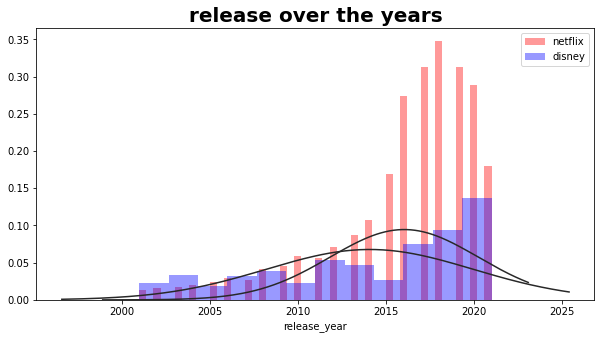

In [185]:
plt.figure(figsize=(10, 5))
sns.distplot(netflix_df.loc[netflix_df['release_year'] > 2000, 'release_year'], fit=norm, kde=False, color='red', label='netflix')
sns.distplot(disney_df.loc[disney_df['release_year'] > 2000, 'release_year'], fit=norm, kde=False, color='blue', label='disney')

plt.title('release over the years', fontsize=20, fontweight='bold')
plt.legend()
plt.show()

#### Duration

In [168]:
netflix_movie_df = netflix_df[netflix_df['type'] == 'Movie']
netflix_show_df = netflix_df[netflix_df['type'] == 'TV Show']

disney_movie_df = disney_df[disney_df['type'] == 'Movie']
disney_show_df = disney_df[disney_df['type'] == 'TV Show']

In [171]:
fig = px.histogram(x=netflix_show_df['duration'])
fig.update_xaxes(categoryorder = 'total descending')
fig.update_layout(title=format_title("Netflix distribution of shows duration"),
                  xaxis_title='Duration of the Show')

fig.show()

In [172]:
fig = px.histogram(x=disney_show_df['duration'])
fig.update_xaxes(categoryorder = 'total descending')
fig.update_layout(title=format_title("Disney distribution of shows duration"),
                  xaxis_title='Duration of the Show')

fig.show()

In [174]:
netflix_temp_duration = netflix_movie_df['duration'].apply(lambda x: int(x.split(' ')[0]))
disney_temp_duration = disney_movie_df['duration'].apply(lambda x: int(x.split(' ')[0]))

In [175]:
netflix_movie_df.loc[netflix_temp_duration.loc[netflix_temp_duration < 90].index, 'duration_bin'] = 'Less than 1.30 hrs'
netflix_movie_df.loc[netflix_temp_duration.loc[(netflix_temp_duration >= 90)
 & (netflix_temp_duration < 150)].index, 'duration_bin'] = 'More than 1.30 - less than 2.30 hrs'
netflix_movie_df.loc[netflix_temp_duration.loc[netflix_temp_duration >= 150].index, 'duration_bin'] = 'More than 2.30 hrs'

In [177]:
netflix_movie_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country,duration_bin
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Teens,United States,More than 1.30 - less than 2.30 hrs
6,s7,Movie,My Little Pony: A New Generation,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,Older Kids,United States,More than 1.30 - less than 2.30 hrs
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,September,Adults,United States,More than 1.30 - less than 2.30 hrs
9,s10,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,September,Teens,United States,More than 1.30 - less than 2.30 hrs
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,September,Adults,Germany,More than 1.30 - less than 2.30 hrs


In [178]:
disney_movie_df.loc[disney_temp_duration.loc[disney_temp_duration < 90].index, 'duration_bin'] = 'Less than 1.30 hrs'
disney_movie_df.loc[disney_temp_duration.loc[(disney_temp_duration >= 90)
 & (disney_temp_duration < 150)].index, 'duration_bin'] = 'More than 1.30 - less than 2.30 hrs'
disney_movie_df.loc[disney_temp_duration.loc[disney_temp_duration >= 150].index, 'duration_bin'] = 'More than 2.30 hrs'

In [179]:
disney_movie_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country,duration_bin
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,November,Kids,United States,Less than 1.30 hrs
1,s2,Movie,Ernest Saves Christmas,United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021,November,Older Kids,United States,More than 1.30 - less than 2.30 hrs
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021,November,Kids,United States,Less than 1.30 hrs
3,s4,Movie,The Queen Family Singalong,United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",2021,November,Older Kids,United States,Less than 1.30 hrs
5,s6,Movie,Becoming Cousteau,United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,2021,November,Teens,United States,More than 1.30 - less than 2.30 hrs


In [180]:
fig = px.histogram(x=netflix_movie_df['duration_bin'], color=netflix_movie_df['duration_bin'])
fig.update_xaxes(categoryorder = 'array',
                 categoryarray = ['Less than 1.30 hrs', 'More than 1.30 - less than 2.30 hrs', 'More than 2.30 hrs'])
fig.update_layout(
    title=format_title('Netlfix distribution of movies duration'),
    xaxis_title='Duration of the Movies'
)

In [183]:
fig = px.histogram(x=disney_movie_df['duration_bin'], color=disney_movie_df['duration_bin'])
fig.update_xaxes(categoryorder = 'array',
                 categoryarray = ['Less than 1.30 hrs', 'More than 1.30 - less than 2.30 hrs', 'More than 2.30 hrs'])
fig.update_layout(
    title=format_title('Disney distribution of movies duration'),
    xaxis_title='Duration of the Movies'
)

* TV Show의 경우 Disney, Netflix 모두 season 1개가 대부분
* Movie의 경우 Disney 는 짧은 영화의 비율이 더 많은 반면 Netflix 는 1시간 30분에서 2시간 30분 정도 적절한 running time의 영화 비율이 높음 => Disney는 아이를, Netflix는 성인을 위한 컨텐츠 비율이 더 높기 때문에 그렇지 않을까?

#### Genre

In [186]:
netflix_movie_df['genre'] = netflix_movie_df['listed_in'].apply(lambda x:x.replace(' ,',',').replace(', ',',').split(','))
netflix_show_df['genre'] = netflix_show_df['listed_in'].apply(lambda x:x.replace(' ,',',').replace(', ',',').split(','))

display(netflix_movie_df['genre'].head())
display(netflix_show_df['genre'].head())

0                                       [Documentaries]
6                            [Children & Family Movies]
7     [Dramas, Independent Movies, International Mov...
9                                    [Comedies, Dramas]
12                       [Dramas, International Movies]
Name: genre, dtype: object

1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
5                 [TV Dramas, TV Horror, TV Mysteries]
Name: genre, dtype: object

In [187]:
disney_movie_df['genre'] = disney_movie_df['listed_in'].apply(lambda x:x.replace(' ,',',').replace(', ',',').split(','))
disney_show_df['genre'] = disney_show_df['listed_in'].apply(lambda x:x.replace(' ,',',').replace(', ',',').split(','))

display(disney_movie_df['genre'].head())
display(disney_show_df['genre'].head())

0            [Animation, Family]
1                       [Comedy]
2    [Animation, Comedy, Family]
3                      [Musical]
5    [Biographical, Documentary]
Name: genre, dtype: object

6                        [Action-Adventure, Superhero]
7                      [Docuseries, Reality, Survival]
8               [Animals & Nature, Docuseries, Family]
13    [Action-Adventure, Animals & Nature, Docuseries]
17                                   [Animation, Kids]
Name: genre, dtype: object

In [189]:
from sklearn.preprocessing import MultiLabelBinarizer

def calculate_mlb(series):
  mlb = MultiLabelBinarizer()
  mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
  return mlb_df

def top_genres(df, title='Tope ones'):
  genres_df = calculate_mlb(df['genre'])
  tdata = genres_df.sum().sort_values(ascending=False)

  fig = go.Figure()
  fig.add_trace(go.Bar(
      x=tdata.index,
      y=tdata.values,
  ))
  fig.update_xaxes(categoryorder='total descending')
  fig.update_layout(title=format_title(title))
  fig.show()

In [191]:
top_genres(netflix_movie_df, title='Netflix Top Movies Genre')

In [192]:
top_genres(disney_movie_df, title='Disney Top Movies Genre')

In [193]:
top_genres(netflix_show_df, title='Netflix Top Shows Genre')

In [194]:
top_genres(disney_show_df, title='Disney Top Shows Genre')

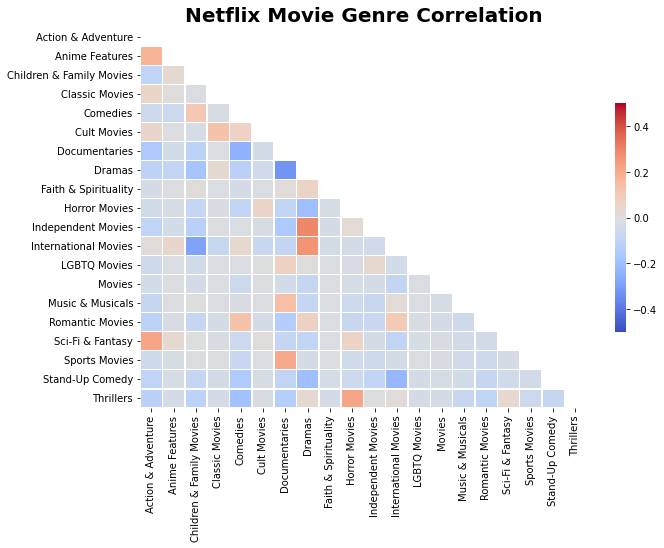

In [198]:
netflix_genres_df = calculate_mlb(netflix_movie_df['genre'])

movie_corr = netflix_genres_df.corr()
movie_mask = np.zeros_like(movie_corr, dtype=np.bool)
movie_mask[np.triu_indices_from(movie_mask)] = True

fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(movie_corr, mask=movie_mask, cmap='coolwarm', vmax=.5, vmin=-.5, center=0, linewidths=.5, cbar_kws={'shrink':0.6})
plt.title('Netflix Movie Genre Correlation', fontsize=20, fontweight='bold')
plt.show()

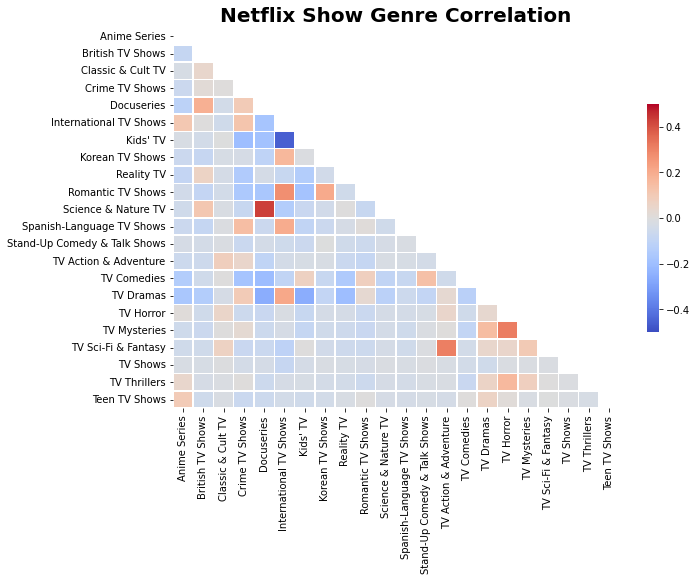

In [199]:
netflix_genres_df2 = calculate_mlb(netflix_show_df['genre'])

show_corr = netflix_genres_df2.corr()
show_mask = np.zeros_like(show_corr, dtype=np.bool)
show_mask[np.triu_indices_from(show_mask)] = True

fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(show_corr, mask=show_mask, cmap='coolwarm', vmax=.5, vmin=-.5, center=0, linewidths=.5, cbar_kws={'shrink':0.6})
plt.title('Netflix Show Genre Correlation', fontsize=20, fontweight='bold')
plt.show()

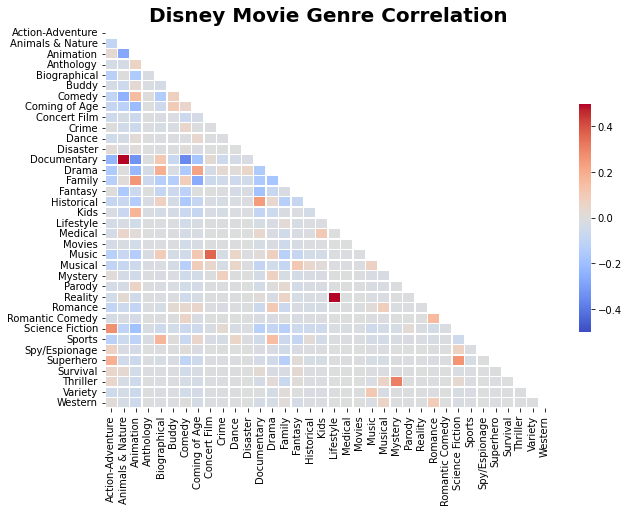

In [200]:
disney_genres_df = calculate_mlb(disney_movie_df['genre'])

movie_corr = disney_genres_df.corr()
movie_mask = np.zeros_like(movie_corr, dtype=np.bool)
movie_mask[np.triu_indices_from(movie_mask)] = True

fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(movie_corr, mask=movie_mask, cmap='coolwarm', vmax=.5, vmin=-.5, center=0, linewidths=.5, cbar_kws={'shrink':0.6})
plt.title('Disney Movie Genre Correlation', fontsize=20, fontweight='bold')
plt.show()

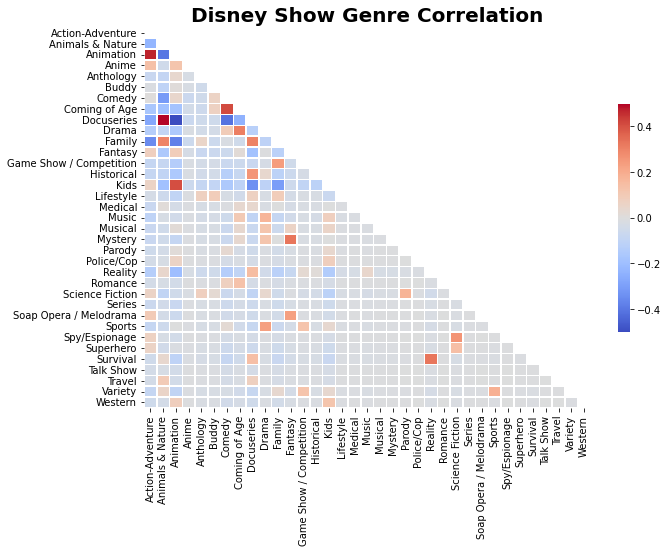

In [201]:
disney_genres_df2 = calculate_mlb(disney_show_df['genre'])

show_corr = disney_genres_df2.corr()
show_mask = np.zeros_like(show_corr, dtype=np.bool)
show_mask[np.triu_indices_from(show_mask)] = True

fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(show_corr, mask=show_mask, cmap='coolwarm', vmax=.5, vmin=-.5, center=0, linewidths=.5, cbar_kws={'shrink':0.6})
plt.title('Disney Show Genre Correlation', fontsize=20, fontweight='bold')
plt.show()

In [207]:
'''
fig, ax = plt.subplots(1,1, figsize=(10,10))

netflix_country_order=['United States', 'United Kingdom', 'Canada', 'France', 'Australia', 'Argentina', 'Ireland', 'Germany', 'China', 'India']
age_order = ['Kids', 'Older Kids', 'Teens', 'Adults']

sns.heatmap(netflix_df.loc[age_order,netflix_country_order], cmap=cmap, squre=True, linewidth=2.5, cbar=False,
            annot=True, fmt='1.0%', vmax=0.6, vmin=0.6, ax=ax, annot_kws={'fontsize':12})

ax.spines['top'].set_visible(True)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)

ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both', length=0)
plt.tight_layout()
plt.show()
'''

"\nfig, ax = plt.subplots(1,1, figsize=(10,10))\n\nnetflix_country_order=['United States', 'United Kingdom', 'Canada', 'France', 'Australia', 'Argentina', 'Ireland', 'Germany', 'China', 'India']\nage_order = ['Kids', 'Older Kids', 'Teens', 'Adults']\n\nsns.heatmap(netflix_df.loc[age_order,netflix_country_order], cmap=cmap, squre=True, linewidth=2.5, cbar=False,\n            annot=True, fmt='1.0%', vmax=0.6, vmin=0.6, ax=ax, annot_kws={'fontsize':12})\n\nax.spines['top'].set_visible(True)\n\nax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)\nax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)\n\nax.set_ylabel('')\nax.set_xlabel('')\nax.tick_params(axis=u'both', which=u'both', length=0)\nplt.tight_layout()\nplt.show()\n"

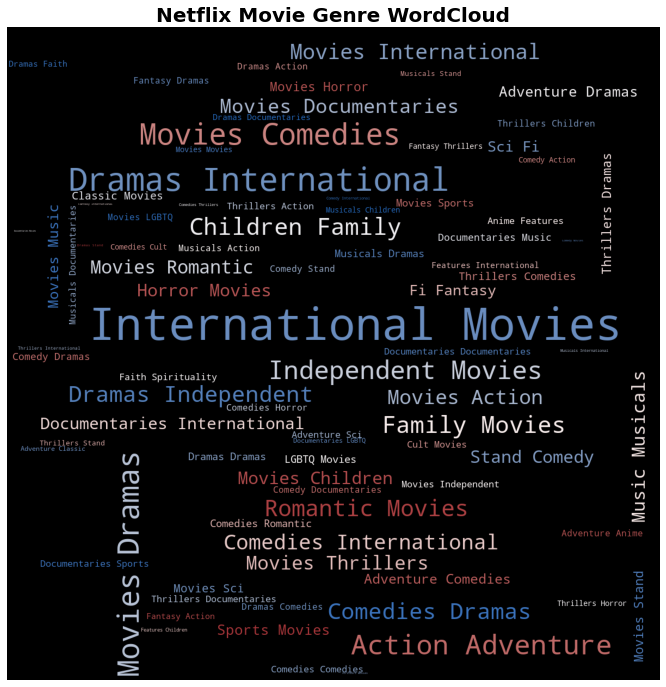

In [216]:
text = ' '.join(netflix_movie_df['listed_in'])

plt.rcParams['figure.figsize'] = (12, 12)
wordcloud = WordCloud(background_color = 'black', colormap='vlag', width = 1200, height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Netflix Movie Genre WordCloud', fontsize=20, fontweight='bold')
plt.show()

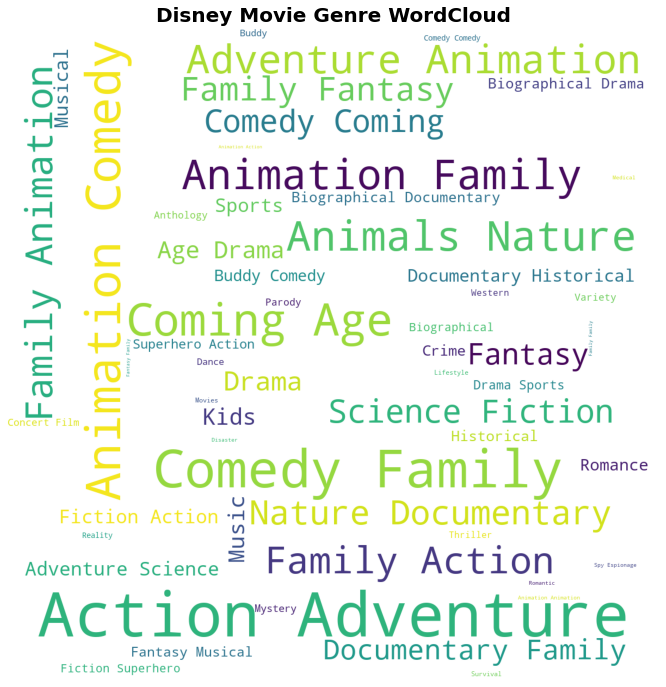

In [218]:
text = ' '.join(disney_movie_df['listed_in'])

plt.rcParams['figure.figsize'] = (12, 12)
wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Disney Movie Genre WordCloud', fontsize=20, fontweight='bold')
plt.show()